# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

In [2]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


자카드 유사도

In [5]:
def jaccard_similarity(d1, d2):
  lemmatizer = WordNetLemmatizer()

  words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
  words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

  inter = len(set(words1).intersection(set(words2)))
  union = len(set(words1).union(set(words2)))

  return inter/union

In [6]:
d1 = "Think like a man of action and act like man of thought"
d2 = 'Try not to become a man of success but rather try to become a man of value'
d3 = 'Give me liberty, of give me death'

print(jaccard_similarity(d1,d2))
print(jaccard_similarity(d1,d3))
print(jaccard_similarity(d2,d3))

0.17647058823529413
0.07142857142857142
0.0625


코사인 유사도

In [7]:
tiv = TfidfVectorizer()
corpus = [d1,d2,d3]

tfidf = tiv.fit_transform(corpus).todense()

print(cosine_similarity(tfidf[0], tfidf[1]))
print(cosine_similarity(tfidf[0], tfidf[2]))
print(cosine_similarity(tfidf[1], tfidf[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


## 한국어 형태소 분석기 설치

In [1]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
     |████████████████████████████████| 19.4 MB 70.1 MB/s 
     |████████████████████████████████| 448 kB 71.8 MB/s 
     |████████████████████████████████| 86 kB 6.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
+ bash -x
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [8]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [9]:
raw = [x.decode() for x in raw[1:10000]]

reviews = []
for i in raw:
  reviews.append(i.split('\t')[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [10]:
from konlpy.tag import Mecab

tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews]

print(reviews)

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'

## Word2Vec 생성

* word2vec 생성에 필요한 라이브러리들을 추가

In [12]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc 

* `Word2Vec` 모델을 생성
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [13]:
word2vec = Word2Vec(reviews, min_count=5)
word2vec

In [14]:
# 영화와 유사한 단어 출력
word2vec.most_similar('영화')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('작품', 0.9601398706436157),
 ('듯', 0.9486085772514343),
 ('남', 0.9481145143508911),
 ('입니다', 0.9438101053237915),
 ('여운', 0.9429041147232056),
 ('잔잔', 0.9421840310096741),
 ('흐뭇', 0.9421635270118713),
 ('마음', 0.9403071403503418),
 ('이런', 0.9358384013175964),
 ('가슴', 0.935570478439331)]

* t-sne을 이용한 단어 벡터 시각화

In [15]:
tsne = TSNE(n_components=2) #2차원으로 변환
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

In [16]:
vocab = word2vec.wv.vocab
similarity = word2vec[vocab]
similarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[ 2.77679390e-03, -8.66741911e-02, -1.62149072e-02, ...,
        -2.70839900e-01, -1.82063431e-01,  1.34250835e-01],
       [-6.98551387e-02, -2.01058716e-01, -3.64143886e-02, ...,
        -5.72646797e-01, -3.40904832e-01,  1.04087465e-01],
       [ 6.06149077e-01, -4.22075570e-01, -5.14791429e-01, ...,
        -5.58211923e-01, -3.85582119e-01,  6.93332851e-02],
       ...,
       [-6.36612385e-05, -1.48214353e-02,  1.50113658e-04, ...,
        -1.50966775e-02, -2.91304272e-02,  1.51779912e-02],
       [-1.58677287e-02, -3.74640413e-02, -1.18855212e-03, ...,
        -8.24637059e-03, -3.13641354e-02,  6.73415605e-03],
       [-1.23403920e-02, -2.83942502e-02, -5.87127777e-03, ...,
        -1.54437758e-02, -2.54860967e-02,  8.62257276e-03]], dtype=float32)

In [17]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity) 
df = pd.DataFrame(transform_similarity, index=vocab, columns=['x','y'])
df[0:10]

,x,y
어릴,22.121061,-34.786835
때,7.293932,-67.026535
보,5.064038,-78.666595
고,6.291815,-78.393860
지금,7.676577,-76.576668
다시,7.384405,-77.881226
봐도,8.698898,-78.003113
재밌,15.485827,-82.946571
어요,16.400139,-82.039352
ㅋㅋ,18.835663,-82.821388


시각화

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


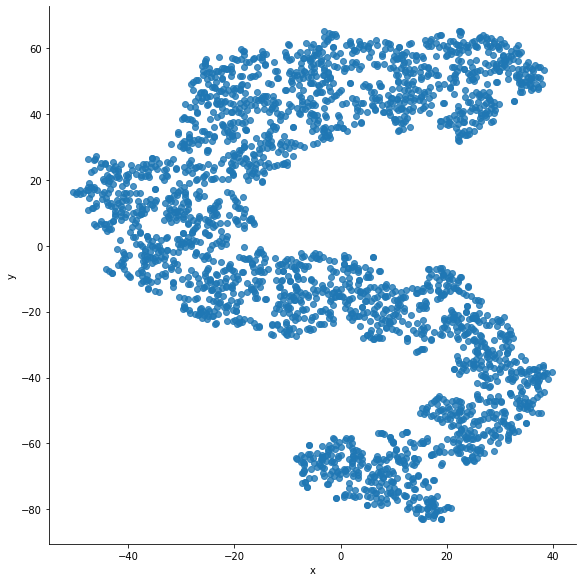

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot('x', 'y', data=df, fit_reg=False, size=8)
plt.show()

## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### Scikit-learn

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

* `scikit-learn` 사용 예제에서는 종료 조건 간의 차이를 비교

#### ward

In [20]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
predict = ward.fit_predict(df)
predict

array([2, 5, 5, ..., 4, 4, 4])

In [21]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,22.121061,-34.786835,2
때,7.293932,-67.026535,5
보,5.064038,-78.666595,5
고,6.291815,-78.393860,5
지금,7.676577,-76.576668,5
다시,7.384405,-77.881226,5
봐도,8.698898,-78.003113,5
재밌,15.485827,-82.946571,5
어요,16.400139,-82.039352,5
ㅋㅋ,18.835663,-82.821388,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


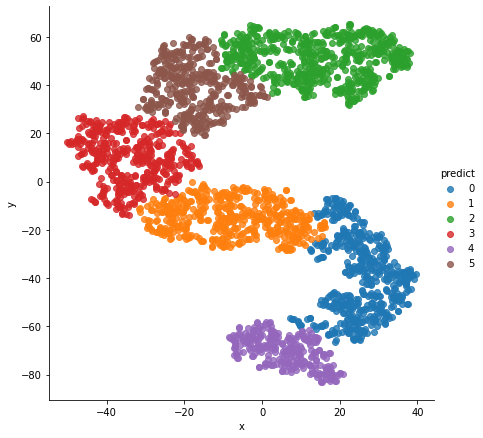

In [27]:
sns.lmplot('x','y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()

#### average

In [24]:
avg = AgglomerativeClustering(n_clusters=6, linkage='average')
predict = avg.fit_predict(df)
predict

array([0, 4, 4, ..., 2, 2, 2])

In [25]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,22.121061,-34.786835,0
때,7.293932,-67.026535,4
보,5.064038,-78.666595,4
고,6.291815,-78.393860,4
지금,7.676577,-76.576668,4
다시,7.384405,-77.881226,4
봐도,8.698898,-78.003113,4
재밌,15.485827,-82.946571,4
어요,16.400139,-82.039352,4
ㅋㅋ,18.835663,-82.821388,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


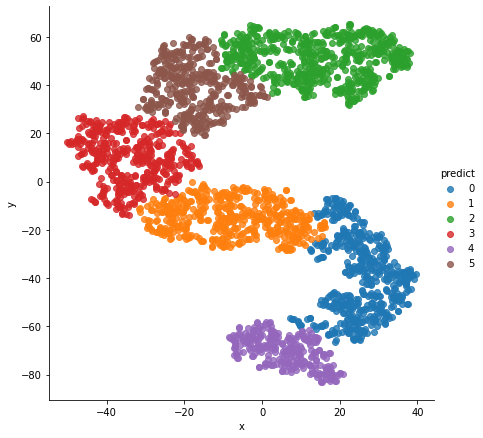

In [28]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()

#### complete

In [29]:
complete = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict = complete.fit_predict(df)
predict

array([0, 3, 3, ..., 4, 4, 4])

In [30]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
어릴,22.121061,-34.786835,0
때,7.293932,-67.026535,3
보,5.064038,-78.666595,3
고,6.291815,-78.393860,3
지금,7.676577,-76.576668,3
다시,7.384405,-77.881226,3
봐도,8.698898,-78.003113,3
재밌,15.485827,-82.946571,3
어요,16.400139,-82.039352,3
ㅋㅋ,18.835663,-82.821388,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


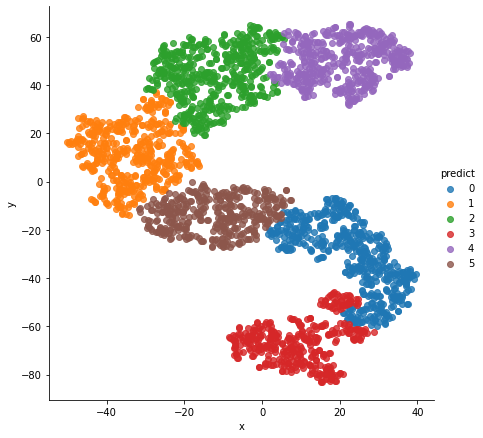

In [31]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()

### Scipy

* scipy를 이용한 거리 사용과 word2vec 사용을 비교

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [36]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,35.612386,47.173885,46.488038,44.317415,45.643133,45.351970,48.707151,47.692026,48.240151,45.192199,36.770163,45.117686,46.378850,38.763016,41.447563,88.291908,41.350593,42.699307,42.692631,41.905383,97.851822,31.745137,52.930972,46.302798,42.727244,31.543049,47.173148,37.395288,18.514020,39.631549,30.954824,39.855045,42.835489,86.479946,28.269517,40.113376,35.463068,33.345384,18.762926,...,81.973736,74.509373,72.492812,96.905164,74.287864,92.696627,78.037596,72.009878,77.561476,90.372019,89.699896,79.479192,71.209418,84.567166,93.587108,89.984716,96.480759,86.118435,78.213944,71.366569,95.044732,78.545295,72.859104,21.786302,85.431147,95.149437,85.429558,82.927854,91.825198,89.914217,83.495726,87.496168,64.653424,89.136979,91.213650,74.664613,77.899451,85.130065,95.495625,91.703236
1,35.612386,0.000000,11.851727,11.411411,9.557795,10.855068,11.066128,17.904042,17.558693,19.562437,14.637048,12.473435,14.508857,55.100690,12.385657,15.198690,113.459135,14.451469,14.496116,14.301166,11.671348,131.671972,42.722143,65.096846,10.910895,10.824849,43.784239,15.790994,9.630659,31.792440,10.954667,16.434677,13.643239,7.247818,113.150636,12.069192,13.927177,1.585643,2.297173,40.003815,...,114.191362,105.701454,100.979211,127.658980,108.125209,124.164197,105.846899,98.278817,89.940416,124.920972,113.949490,110.896270,102.673613,119.176521,121.915696,123.664277,128.994311,120.408755,112.096503,104.044759,124.189933,112.155991,105.573964,53.101786,114.245244,128.331748,118.828874,115.538390,120.455204,121.266949,112.700070,121.955227,83.773899,123.369093,121.647328,107.719254,111.646479,119.605029,129.200920,126.053300
2,47.173885,11.851727,0.000000,1.257705,3.345618,2.449675,3.694918,11.266405,11.827200,14.384712,15.592899,19.745522,15.481022,64.333950,18.374469,19.622095,124.363199,18.806922,17.784464,17.541813,14.921350,143.522054,53.108970,74.548460,5.226314,12.854874,54.282722,9.530981,12.903664,40.985112,16.178796,22.754488,18.968912,4.992051,124.284683,20.922997,19.104109,11.759964,14.015035,51.550295,...,125.971967,117.411444,112.409278,139.281903,119.976458,135.871373,117.171508,109.436773,98.715876,136.755608,124.702721,122.617253,114.411625,131.005270,133.250427,135.512718,140.784282,132.254937,123.947801,115.862497,135.626823,124.004651,117.392484,64.922021,125.667925,140.162113,130.670803,127.343966,131.834963,132.967097,124.175827,133.794559,93.972029,135.217327,133.245126,119.552330,123.497082,131.442958,141.049233,137.898287
3,46.488038,11.411411,1.257705,0.000000,2.284678,1.206874,2.438592,10.259485,10.745595,13.302298,16.419329,20.075002,16.303462,64.606558,18.810004,20.230732,124.338832,19.407190,18.460596,18.217111,15.527684,143.044538,53.169594,74.795702,6.159550,13.498605,54.322141,8.440615,11.738917,39.942740,16.635834,21.599249,19.481140,5.021759,124.196911,19.937761,19.633120,11.163235,13.494643,51.295241,...,125.601435,117.092863,112.222273,139.013244,119.485267,135.555148,117.022713,109.339839,99.079972,136.203431,124.716075,122.291737,114.074266,130.444147,133.099742,135.043530,140.405272,131.728666,123.455174,115.453212,135.439210,123.534564,116.982201,64.489194,125.484944,139.734844,130.221468,126.948986,131.668283,132.655180,123.972159,133.251318,94.097454,134.698072,132.988647,119.120697,123.015599,130.897103,140.580551,137.368125
4,44.317415,9.557795,3.345618,2.284678,0.000000,1.336875,1.754960,10.077701,10.292786,12.787561,16.679352,19.288064,16.555853,63.598910,18.230071,19.974973,122.852475,19.142537,18.363457,18.120998,15.325583,141.026720,51.836769,73.738512,6.994720,13.410873,52.956629,8.038982,9.575535,37.677602,16.123478,19.416104,19.040682,4.290749,122.624405,17.653238,19.223900,

* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

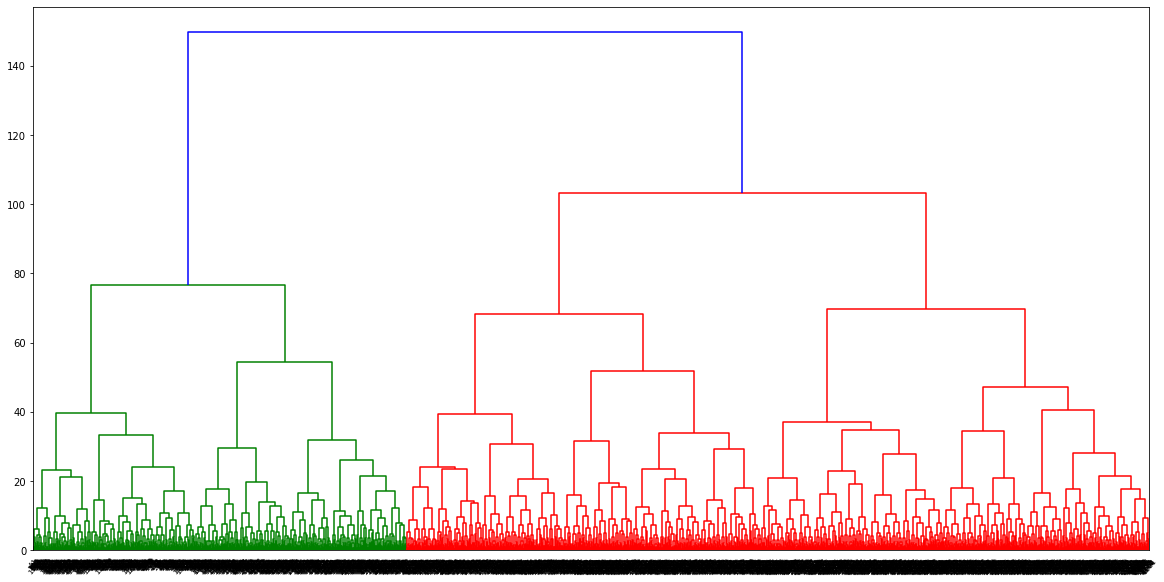

In [37]:
row_clusters = linkage(distmatrix, method='complete')

plt.figure(figsize=(20,10))
dendrogram(row_clusters,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

* `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

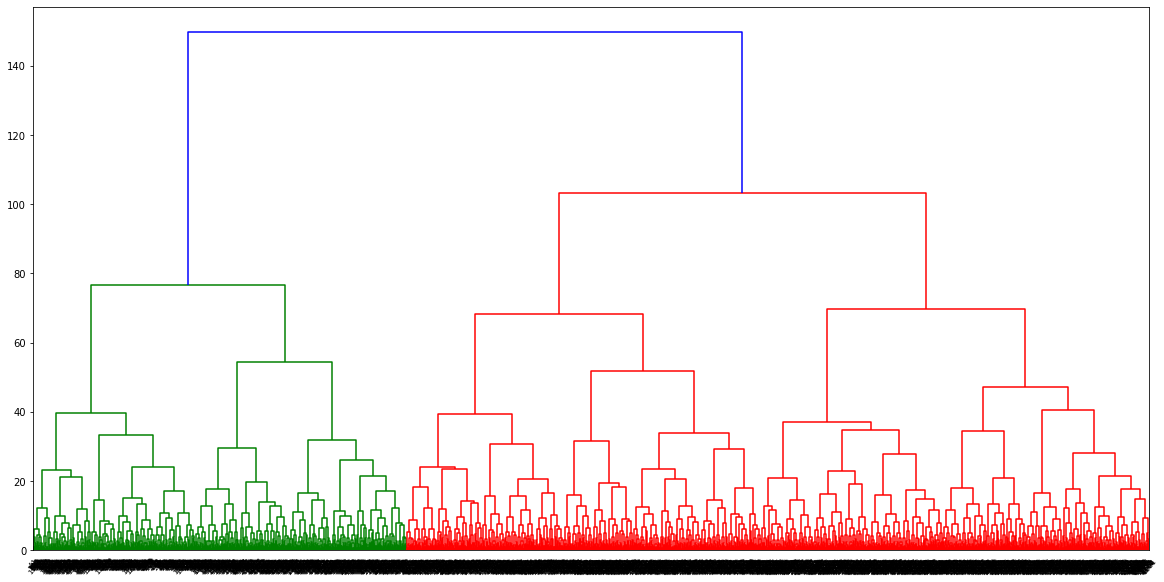

In [38]:
mergins = linkage(df, method='complete')

plt.figure(figsize=(20, 10))
dendrogram(mergins,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

## Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(df)
predict

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [41]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
어릴,22.121061,-34.786835,0
때,7.293932,-67.026535,0
보,5.064038,-78.666595,0
고,6.291815,-78.393860,0
지금,7.676577,-76.576668,0
다시,7.384405,-77.881226,0
봐도,8.698898,-78.003113,0
재밌,15.485827,-82.946571,0
어요,16.400139,-82.039352,0
ㅋㅋ,18.835663,-82.821388,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


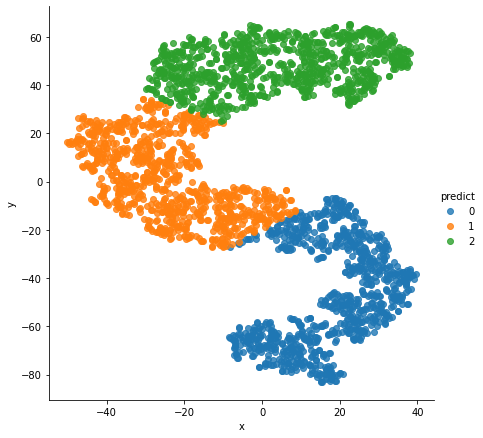

In [43]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()

### 클러스터 개수 6

In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(df)
predict

array([5, 0, 0, ..., 4, 4, 4], dtype=int32)

In [45]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
어릴,22.121061,-34.786835,5
때,7.293932,-67.026535,0
보,5.064038,-78.666595,0
고,6.291815,-78.393860,0
지금,7.676577,-76.576668,0
다시,7.384405,-77.881226,0
봐도,8.698898,-78.003113,0
재밌,15.485827,-82.946571,0
어요,16.400139,-82.039352,0
ㅋㅋ,18.835663,-82.821388,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


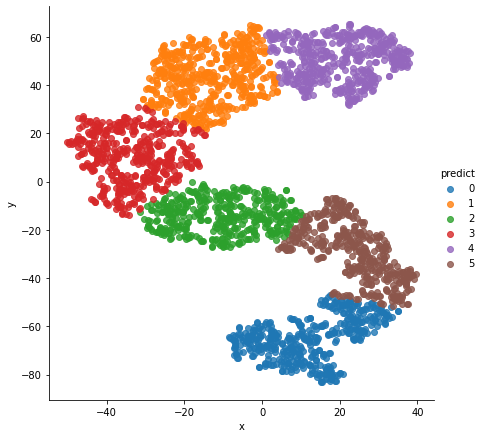

In [46]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()